<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [2]:
# Check for GPU
!nvidia-smi

Thu Oct 30 08:24:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   55C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code


2.8.0+cu126


## 1. What are 3 areas in industry where computer vision is currently being used?

In [4]:
print("Robotic, Medical image processing and autonomus driving")

Robotic, Medical image processing and autonomus driving


## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find.

In [ ]:
print("Overfitting: it is the case where our model adheer too much on the training data and fail to generlize on new data. We can figure it out if the training loss is very small while the validation loss is big.")

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each.
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

In [ ]:
print(" We can fight against overfitting by reducing model capacity, reduce number of features, adding regulraisation, dropout layers, Pooling layers.")

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [10]:
import torch
from torch import nn
from matplotlib import pyplot as plt
from torchvision import datasets
from torchvision.transforms import ToTensor

In [9]:
train_data = datasets.MNIST(root="data", train=True, download=True, transform=ToTensor())
test_data = datasets.MNIST(root="data", train=False, download=True, transform=ToTensor())
print(len(train_data), len(test_data))


60000 10000


torch.Size([1, 28, 28]) 5
['0 - zero', '1 - one', '2 - two', '3 - three', '4 - four', '5 - five', '6 - six', '7 - seven', '8 - eight', '9 - nine']
data


Text(0.5, 1.0, '5')

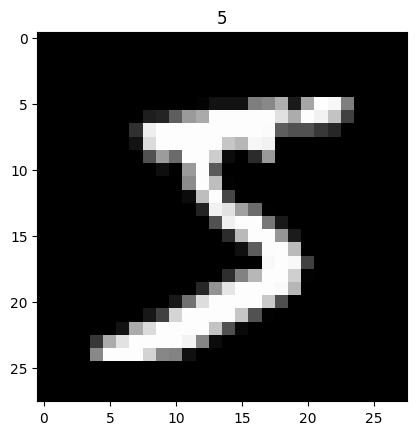

In [17]:
image, label = train_data[0]
class_names = train_data.classes
print(image.shape, label)
print(class_names)
print(train_data.root)
plt.imshow(image.squeeze(), cmap="gray")
plt.title(label)

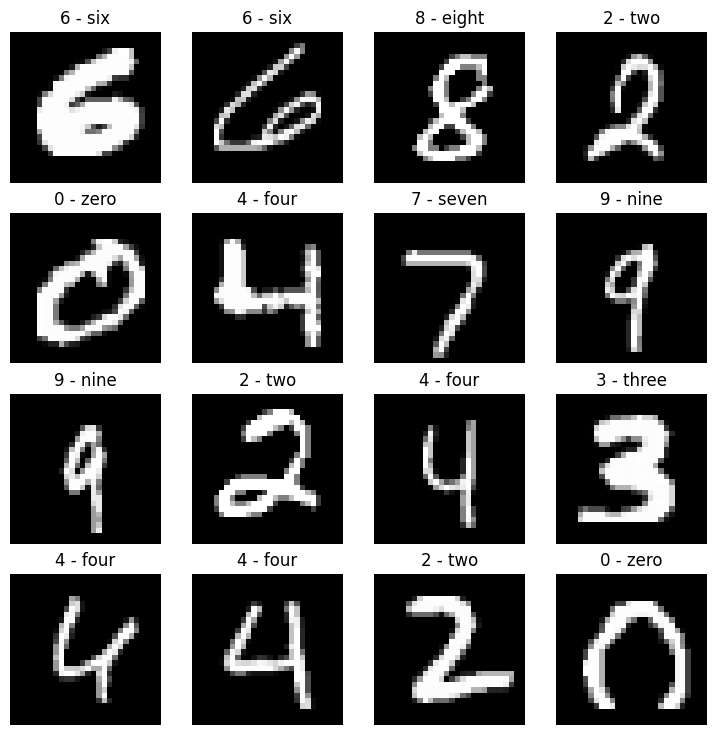

In [18]:
def show_sample_images(data, class_names):
  torch.manual_seed(42)
  fig = plt.figure(figsize=(9, 9))
  rows, cols = 4, 4
  for i in range(1, rows * cols + 1):
      random_idx = torch.randint(0, len(train_data), size=[1]).item()
      img, label = train_data[random_idx]
      fig.add_subplot(rows, cols, i)
      plt.imshow(img.squeeze(), cmap="gray")
      plt.title(class_names[label])
      plt.axis(False);



## 6. Visualize at least 5 different samples of the MNIST training dataset.

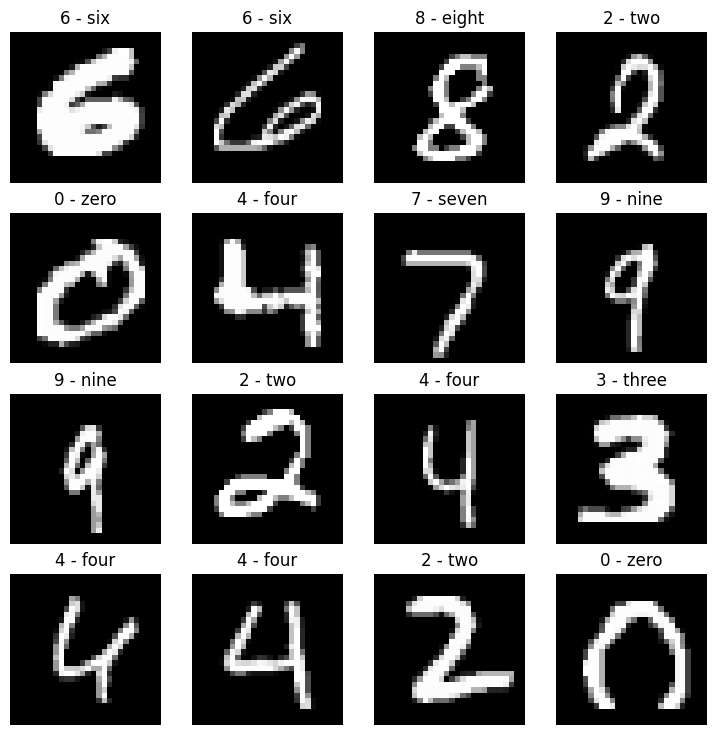

In [19]:
show_sample_images(train_data, class_names=class_names)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [21]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=BATCH_SIZE, shuffle=False)

print(train_dataloader, test_dataloader)
print(len(train_dataloader), len(test_dataloader))

<torch.utils.data.dataloader.DataLoader object at 0x7ad56c550560> <torch.utils.data.dataloader.DataLoader object at 0x7ad56c943050>
1875 313


## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [23]:
class MINSTDigitsClassiferModer(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> torch.Tensor:
    super().__init__()
    self.conv_block1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
    )
    self.conv_block2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7, out_features=output_shape)
    )

  def forward(self, x):
    x = self.conv_block1(x)
    x = self.conv_block2(x)
    x = self.classifier(x)
    return x
model = MINSTDigitsClassiferModer(input_shape=1, hidden_units=10, output_shape=10)
model


MINSTDigitsClassiferModer(
  (conv_block1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [27]:
try:
  import torchmetrics
except:
  !pip install torchmetrics
  import torchmetrics
device = "cuda" if torch.cuda.is_available() else "cpu"
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.2/983.2 kB 53.2 MB/s eta 0:00:00


In [30]:
#Training Step

def training_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, optimizer: torch.optim.Optimizer, device: torch.device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(target=y,
                                preds=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

#Testing Step

def testing_step(model: torch.nn.Module, data_loader: torch.utils.data.DataLoader, loss_fn: torch.nn.Module, device: torch.device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(target=y, preds=test_pred.argmax(dim=1)) # Go from logits -> pred labels

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [31]:
torch.manual_seed(42)
# Import tqdm for progress bar
from tqdm.auto import tqdm
epochs = 5

for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n---------")
  training_step(model=model, data_loader=train_dataloader, loss_fn=loss_fn, optimizer=optimizer, device=device)
  testing_step(model=model, data_loader=test_dataloader, loss_fn=loss_fn, device=device)
  print("\n")


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.23794 | Train accuracy: 0.92%
Test loss: 0.07792 | Test accuracy: 0.98%



Epoch: 1
---------
Train loss: 0.07212 | Train accuracy: 0.98%
Test loss: 0.05363 | Test accuracy: 0.98%



Epoch: 2
---------
Train loss: 0.05769 | Train accuracy: 0.98%
Test loss: 0.04663 | Test accuracy: 0.98%



Epoch: 3
---------
Train loss: 0.04707 | Train accuracy: 0.99%
Test loss: 0.03819 | Test accuracy: 0.99%



Epoch: 4
---------
Train loss: 0.04066 | Train accuracy: 0.99%
Test loss: 0.03985 | Test accuracy: 0.99%





In [33]:
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(target=y, preds=y_pred.argmax(dim=1))

        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code
model_results = eval_model(model=model, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_results

{'model_name': 'MINSTDigitsClassiferModer',
 'model_loss': 0.03984583169221878,
 'model_acc': tensor(0.9871, device='cuda:0')}

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

tensor([7], device='cuda:0')


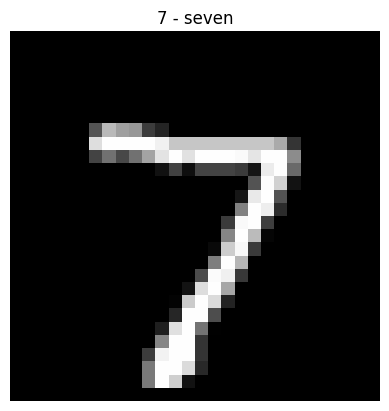

In [38]:
print(model(test_data[0][0].unsqueeze(dim=0).to(device)).argmax(dim=1))
plt.imshow(test_data[0][0].squeeze(), cmap="gray")
plt.title(class_names[test_data[0][1]])
plt.axis(False);


In [40]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 1, so can perform on dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [41]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 2 (2 - two)


In [45]:
# Make predictions on test samples with model
pred_probs= make_predictions(model=model,
                             data=test_samples)

# View first two prediction probabilities list
print(pred_probs)

pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([[2.3191e-11, 1.1482e-07, 1.0000e+00, 2.2158e-08, 3.1555e-18, 4.8634e-16,
         1.9700e-13, 1.1045e-08, 1.2232e-06, 2.9106e-11],
        [6.0997e-08, 9.9985e-01, 3.3808e-07, 1.3681e-07, 1.9214e-06, 1.7780e-05,
         9.1949e-06, 1.6430e-05, 4.6069e-05, 5.6747e-05],
        [3.2639e-04, 1.6209e-11, 9.9965e-01, 9.4558e-06, 4.8600e-12, 4.5038e-07,
         3.2843e-10, 1.1764e-05, 3.0799e-07, 5.6926e-06],
        [4.3776e-13, 2.6060e-10, 1.8595e-10, 4.0351e-10, 9.9995e-01, 3.5394e-08,
         2.3304e-13, 6.5481e-07, 2.8911e-08, 4.4676e-05],
        [2.2968e-07, 6.5871e-13, 2.5103e-11, 1.0663e-13, 8.4482e-10, 9.6202e-09,
         1.0000e+00, 3.1059e-11, 2.6242e-09, 9.2843e-13],
        [3.5741e-07, 1.6006e-09, 3.3740e-10, 1.0278e-12, 7.5093e-09, 1.5996e-08,
         1.0000e+00, 1.6740e-11, 1.2729e-08, 7.4055e-12],
        [2.6582e-16, 3.4031e-12, 1.4656e-11, 2.0976e-12, 1.0000e+00, 3.1150e-10,
         6.0318e-16, 6.3018e-09, 9.1305e-09, 9.3439e-07],
        [4.5896e-11, 2.8215

tensor([2, 1, 2, 4, 6, 6, 4, 9, 1])

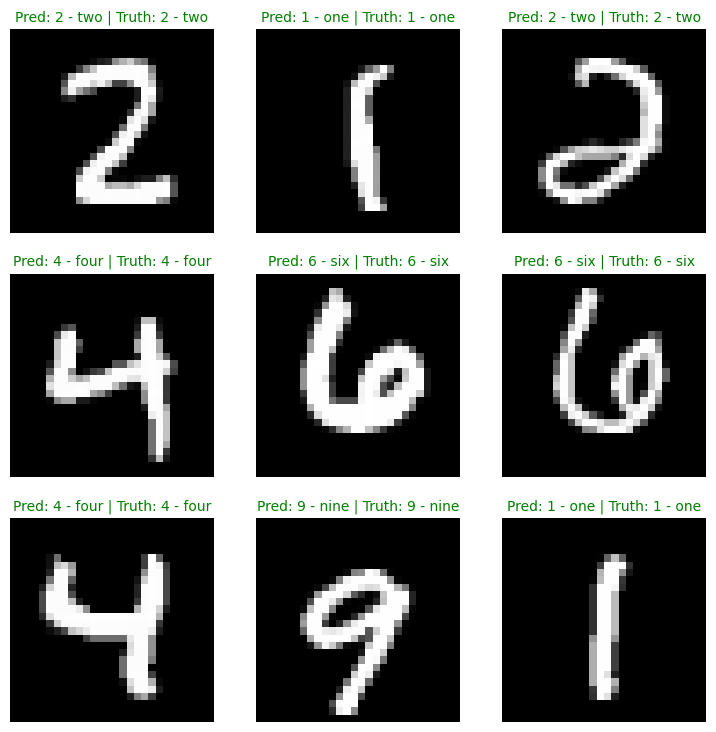

In [46]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [48]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# 1. Make predictions with trained model
y_preds = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions"):
    # Send data and targets to target device
    X, y = X.to(device), y.to(device)
    # Do the forward pass
    y_logit = model(X)
    # Turn predictions from logits -> prediction probabilities -> predictions labels
    y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1) # note: perform softmax on the "logits" dimension, not "batch" dimension (in this case we have a batch size of 32, so can perform on dim=1)
    # Put predictions on CPU for evaluation
    y_preds.append(y_pred.cpu())
# Concatenate list of predictions into a tensor
y_pred_tensor = torch.cat(y_preds)

Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [49]:
# See if torchmetrics exists, if not, install it
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >= 19, "mlxtend verison should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend # <- Note: If you're using Google Colab, this may require restarting the runtime
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")

mlxtend version: 0.23.4


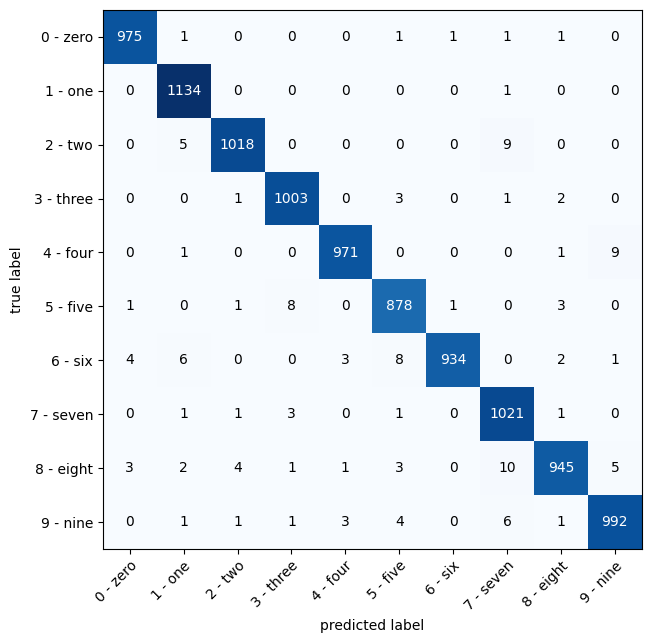

In [50]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [64]:
random_tensor = torch.rand(1, 3, 6, 6)
conv_layer = nn.Conv2d(in_channels=3, out_channels=10, kernel_size=3)
print(conv_layer(random_tensor))
print(random_tensor)


tensor([[[[-0.1688, -0.1337, -0.1304, -0.1676],
          [-0.1379, -0.0900, -0.1826, -0.0829],
          [-0.0657, -0.2527, -0.1920, -0.2073],
          [ 0.0036, -0.1265, -0.3151,  0.2074]],

         [[ 0.4397,  0.4930,  0.0291,  0.0167],
          [ 0.4188, -0.0325,  0.3036,  0.2276],
          [ 0.3236,  0.2041,  0.0271,  0.2397],
          [ 0.3669,  0.2641,  0.2160,  0.2890]],

         [[ 0.1580, -0.1494, -0.1062,  0.1867],
          [-0.0518,  0.2112, -0.3280, -0.0521],
          [-0.1905, -0.0496,  0.0925, -0.1420],
          [ 0.1586, -0.0707,  0.0870,  0.0396]],

         [[ 0.1441,  0.1329,  0.2510,  0.1736],
          [ 0.0089,  0.2019,  0.1847,  0.2311],
          [ 0.1084,  0.3447,  0.0700,  0.0850],
          [ 0.0496,  0.4743,  0.3399,  0.0757]],

         [[-0.0957, -0.0022, -0.2540, -0.2832],
          [-0.1783, -0.2158, -0.2955,  0.0752],
          [-0.0612, -0.1145,  0.0157, -0.1966],
          [-0.3054, -0.4055, -0.2160, -0.0492]],

         [[-0.4802, -0.1507, -

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

100%|██████████| 26.4M/26.4M [00:02<00:00, 10.1MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 154kB/s]
100%|██████████| 4.42M/4.42M [00:01<00:00, 2.75MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 25.0MB/s]


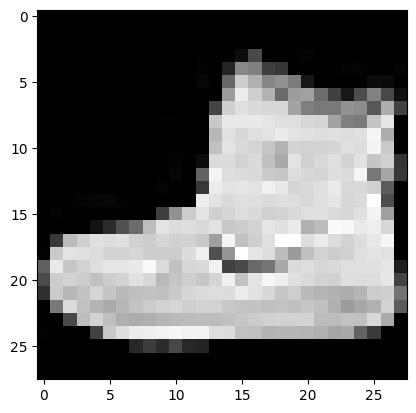

In [65]:
train_data2 = datasets.FashionMNIST(root="data", train=True, download=True, transform=ToTensor())
test_data2 = datasets.FashionMNIST(root="data", train=False, download=True, transform=ToTensor())

plt.imshow(train_data2[0][0].squeeze(), cmap="gray")

In [71]:
image, lable = train_data2[0]

In [72]:
image.shape

torch.Size([1, 28, 28])

In [81]:
pred_probs = model(image.unsqueeze(dim=0).to(device)) # unsqueeze here to add an extra dimention fot he batch size, becaseu The model is expecting input in the shape of [batch_size, channels, height, width], but a single image from the dataset has the shape [channels, height, width]
label = pred_probs.argmax(dim=1)
print(label)


tensor([8], device='cuda:0')
